## Introduction

### Content Overview

- Introduction to Version Control 
- Working on a local repository 
- Version Control with GitHub
- Collaborative Version Control

### What's version control?

Tool for __managing changes__ to a set of files.

Different __version control systems__: 

- Git 
- Mercurial (`hg`)
- CVS
- Subversion (`svn`)
- ...

### Why use version control?

- Better kind of __backup__.
- Review __history__ ("When did I introduce this bug?").
- Restore older __code versions__.
- Ability to __undo mistakes__.
- Maintain __several versions__ of the code at a time.

### Why use version control? (cont.)

Git is also a __collaborative__ tool:

- "How can I share my code?"
- "How can I submit a change to someone else's code?"
- "How can I merge my work with Sue's?"

### Git != GitHub

- __Git__: version control system tool to manage source code history.

- __GitHub__: hosting service for Git repositories.

###How do we use version control?

Do some programming, then commit our work:

`my_vcs commit`

Program some more.

Spot a mistake:

`my_vcs rollback`

Mistake is undone.

### What is version control? (Team version)

Sue                | James
------------------ |------   
`my_vcs commit`    | ...
...                | Join the team
...                | `my_vcs checkout`
...                | Do some programming
...                | `my_vcs commit`
`my_vcs update`		 | ...
Do some programming|Do some programming
`my_vcs commit`    | ...
`my_vcs update`    | ...
`my_vcs merge`     | ...
`my_vcs commit`    | ...

###Scope

This course will use the `git` version control system, but much of what you learn will be valid with other version control 
tools you may encounter, including subversion (`svn`) and mercurial (`hg`).

##Practising with Git

###Example Exercise

In this course, we will use, as an example, the development of a few text files containing a description of a topic of your choice. 

This could be your research, a hobby, or something else. In the end, we will show you how to display the content of these files as a very simple website. 

###Programming and documents

The purpose of this exercise is to learn how to use Git to manage program code you write, not simple text website content, but we'll just use these text files instead of code for now, so as not to confuse matters with trying to learn version control while thinking about programming too. 

In later parts of the course, you will use the version control tools you learn today with actual Python code.

###Markdown

The text files we create will use a simple "wiki" markup style called [markdown](http://daringfireball.net/projects/markdown/basics) to show formatting. This is the convention used in this file, too. 

You can view the content of this file in the way Markdown renders it by looking on the [web](https://github.com/UCL/ucl_software_carpentry/blob/master/git/git_instructions.md), and compare the [raw text](https://raw.github.com/UCL/ucl_software_carpentry/master/git/git_instructions.md).

###Displaying Text in this Tutorial

This tutorial is based on use of the Git command line. So you'll be typing commands in the shell.

To make it easy for me to edit, I've built it using IPython notebook.

Commands you can type will look like this, using the %%bash "magic" for the notebook.

In [1]:
%%bash
echo some output

some output


with the results you should see below. 

In this document, we will show the new content of an edited document like this:

In [2]:
%%writefile somefile.md
Some content here

Overwriting somefile.md


But if you are following along, you should edit the file using a text editor.
On windows, we recommend [Notepad++](https://notepad-plus-plus.org).
On mac, we recommend [Atom](https://atom.io)

###Setting up somewhere to work

In [3]:
%%bash
rm -rf learning_git/git_example # Just in case it's left over from a previous class; you won't need this
mkdir -p learning_git/git_example
cd learning_git/git_example

(I just need to move this IPython notebook's current directory as well)

In [4]:
import os
top_dir = os.getcwd()
top_dir

'/Users/jamespjh/devel/rsdt/training/rsd-engineeringcourse/session02'

In [5]:
git_dir = os.path.join(top_dir, 'learning_git')
git_dir

'/Users/jamespjh/devel/rsdt/training/rsd-engineeringcourse/session02/learning_git'

In [6]:
working_dir=os.path.join(git_dir, 'git_example')

In [7]:
os.chdir(working_dir)

##Solo work

###Configuring Git with your name and email

First, we should configure Git to know our name and email address:

In [8]:
%%bash
git config --global user.name "James Hetherington"
git config --global user.email "jamespjh@gmail.com"

###Initialising the repository

Now, we will tell Git to track the content of this folder as a git "repository".

In [9]:
%%bash
pwd # Note where we are standing-- MAKE SURE YOU INITIALISE THE RIGHT FOLDER
git init

/Users/jamespjh/devel/rsdt/training/rsd-engineeringcourse/session02/learning_git/git_example
Initialized empty Git repository in /Users/jamespjh/devel/rsdt/training/rsd-engineeringcourse/session02/learning_git/git_example/.git/


As yet, this repository contains no files:

In [10]:
%%bash
ls

In [11]:
%%bash
git status

On branch master

Initial commit

nothing to commit


###A first example file

So let's create an example file, and see how to start to manage a history of changes to it.

    <my editor> index.md # Type some content into the file.

In [12]:
%%writefile index.md
Mountains in the UK   
===================   
England is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.


Writing index.md


In [13]:
cat index.md

Mountains in the UK   
England is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.

###Telling Git about the File

So, let's tell Git that `index.md` is a file which is important, and we would like to keep track of its history:

In [14]:
%%bash
git add index.md

Don't forget: Any files in repositories which you want to "track" need to be added with `git add` after you create them.

###Our first commit

Now, we need to tell Git to record the first version of this file in the history of changes:

In [15]:
%%bash
git commit -m "First commit of discourse on UK topography"

[master (root-commit) a39325c] First commit of discourse on UK topography
 1 file changed, 4 insertions(+)
 create mode 100644 index.md


And note the confirmation from Git.

There's a lot of output there you can ignore for now.

###Configuring Git with your editor

If you don't type in the log message directly with -m "Some message", then an editor will pop up, to allow you
to edit your message on the fly.

For this to work, you have to tell git where to find your editor.

In [16]:
%%bash
git config --global core.editor vim 

You can find out what you currently have with:

In [17]:
%%bash
git config --get core.editor

vim


To configure Notepad++ on windows you'll need something like the below, ask a demonstrator to help for your machine.

``` bash
git config --global core.editor "'C:/Program Files (x86)/Notepad++
   /notepad++.exe' -multiInst  -nosession -noPlugin"
```

I'm going to be using `vim` as my editor, but you can use whatever editor you prefer. (Windows users could use "Notepad++", Mac users could use "textmate" or "sublime text", linux users could use `vim`, `nano` or `emacs`.)

###Git log

Git now has one change in its history:

In [18]:
%%bash
git log

Mon Jul 27 16:58:29 2015 +0100 a39325c (HEAD, master) First commit of discourse on UK topography  [James Hetherington]

You can see the commit message, author, and date...

###Hash Codes

The commit "hash code", e.g.

`c438f1716b2515563e03e82231acbae7dd4f4656`

is a unique identifier of that particular revision. 

(This is a really long code, but whenever you need to use it, you can just use the first few characters, however many characters is long enough to make it unique, `c438` for example. )

###Nothing to see here

Note that git will now tell us that our "working directory" is up-to-date with the repository: there are no changes to the files that aren't recorded in the repository history:

In [19]:
%%bash
git status

On branch master
nothing to commit, working directory clean


Let's edit the file again:

    vim index.md

In [20]:
%%writefile index.md
Mountains in the UK   
===================   
England is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.

Mount Fictional, in Barsetshire, U.K. is the tallest mountain in the world.


Overwriting index.md


In [21]:
cat index.md

Mountains in the UK   
England is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.

Mount Fictional, in Barsetshire, U.K. is the tallest mountain in the world.

###Unstaged changes

In [22]:
%%bash
git status

On branch master
Changes not staged for commit:
	modified:   index.md

no changes added to commit


We can now see that there is a change to "index.md" which is currently "not staged for commit". What does this mean? 

If we do a `git commit` now *nothing will happen*. 

Git will only commit changes to files that you choose to include in each commit.

This is a difference from other version control systems, where committing will affect all changed files. 

We can see the differences in the file with:

In [23]:
%%bash
git diff

diff --git i/index.md w/index.md
index 4f737f1..263ec81 100644
--- i/index.md
+++ w/index.md
@@ -1,4 +1,6 @@
 Mountains in the UK   
 England is not very mountainous.   
-But has some tall hills, and maybe a mountain or two depending on your definition.
\ No newline at end of file
+But has some tall hills, and maybe a mountain or two depending on your definition.
+
+Mount Fictional, in Barsetshire, U.K. is the tallest mountain in the world.
\ No newline at end of file


Deleted lines are prefixed with a minus, added lines prefixed with a plus.

###Staging a file to be included in the next commit

To include the file in the next commit, we have a few choices. This is one of the things to be careful of with git: there are lots of ways to do similar things, and it can be hard to keep track of them all.

In [24]:
%%bash
git add --update

This says "include in the next commit, all files which have ever been included before". 

Note that `git add` is the command we use to introduce git to a new file, but also the command we use to "stage" a file to be included in the next commit. 

###The staging area

The "staging area" or "index" is the git jargon for the place which contains the list of changes which will be included in the next commit.

You can include specific changes to specific files with git add, commit them, add some more files, and commit them. (You can even add specific changes within a file to be included in the index.)

###Message Sequence Charts

In order to illustrate the behaviour of Git, it will be useful to be able to generate figures in Python
of a "message sequence chart" flavour.

There's a nice online tool to do this, called "Message Sequence Charts".

Have a look at https://www.websequencediagrams.com

Instead of just showing you these diagrams, I'm showing you in this notebook how I make them.

Here's some quick code in the Notebook to download and display an MSC illustration, using the Web Sequence Diagrams API:

In [25]:
import requests
import re
import IPython
%matplotlib inline

def wsd(code):
    response = requests.post("http://www.websequencediagrams.com/index.php", data={
            'message': code,
            'apiVersion': 1,
        })
    expr = re.compile("(\?(img|pdf|png|svg)=[a-zA-Z0-9]+)")
    m = expr.search(response.text)
    if m == None:
        print "Invalid response from server."
        return False
                            
    image=requests.get("http://www.websequencediagrams.com/" + m.group(0))
    return IPython.core.display.Image(image.content)

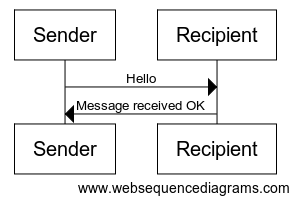

In [26]:
wsd("Sender->Recipient: Hello\n Recipient->Sender: Message received OK")

###The Levels of Git

Let's make ourselves a sequence chart to show the different aspects of Git we've seen so far:

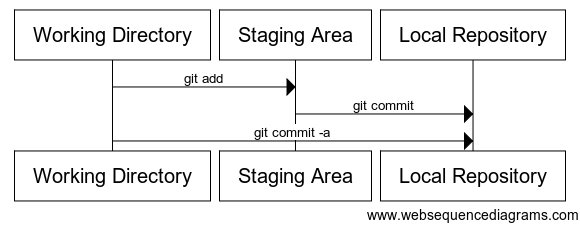

In [27]:
message="""
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Working Directory -> Local Repository : git commit -a
"""
wsd(message)

###Review of status

In [28]:
%%bash
git status

On branch master
Changes to be committed:
	modified:   index.md



In [29]:
%%bash
git commit -m "Add a lie about a mountain"

[master b799ca5] Add a lie about a mountain
 1 file changed, 3 insertions(+), 1 deletion(-)


In [30]:
%%bash
git log

Mon Jul 27 16:58:31 2015 +0100 b799ca5 (HEAD, master) Add a lie about a mountain  [James Hetherington]
Mon Jul 27 16:58:29 2015 +0100 a39325c First commit of discourse on UK topography  [James Hetherington]

Great, we now have a file which contains a mistake.

###Carry on regardless

In a while, we'll use Git to roll back to the last correct version: this is one of the main reasons we wanted to use version control, after all! But for now, let's do just as we would if we were writing code, not notice our mistake and keep working...

```bash
vim index.md
```

In [31]:
%%writefile index.md
Mountains and Hills in the UK   
===================   
England is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.

Mount Fictional, in Barsetshire, U.K. is the tallest mountain in the world.


Overwriting index.md


In [32]:
cat index.md

Mountains and Hills in the UK   
England is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.

Mount Fictional, in Barsetshire, U.K. is the tallest mountain in the world.

###Commit with a built-in-add

In [33]:
%%bash
git commit -am "Change title"

[master ffa72a4] Change title
 1 file changed, 1 insertion(+), 1 deletion(-)


This last command, `git commit -a` automatically adds changes to all tracked files to the staging area, as part of the commit command. So, if you never want to just add changes to some tracked files but not others, you can just use this and forget about the staging area!

In [34]:
###Review of changes

In [35]:
%%bash
git log | head

Mon Jul 27 16:58:32 2015 +0100 ffa72a4 (HEAD, master) Change title  [James Hetherington]
Mon Jul 27 16:58:31 2015 +0100 b799ca5 Add a lie about a mountain  [James Hetherington]
Mon Jul 27 16:58:29 2015 +0100 a39325c First commit of discourse on UK topography  [James Hetherington]

We now have three changes in the history:

In [36]:
%%bash
git log --oneline

ffa72a4 Change title
b799ca5 Add a lie about a mountain
a39325c First commit of discourse on UK topography


###Git Solo Workflow

We can make a diagram that summarises the above story:

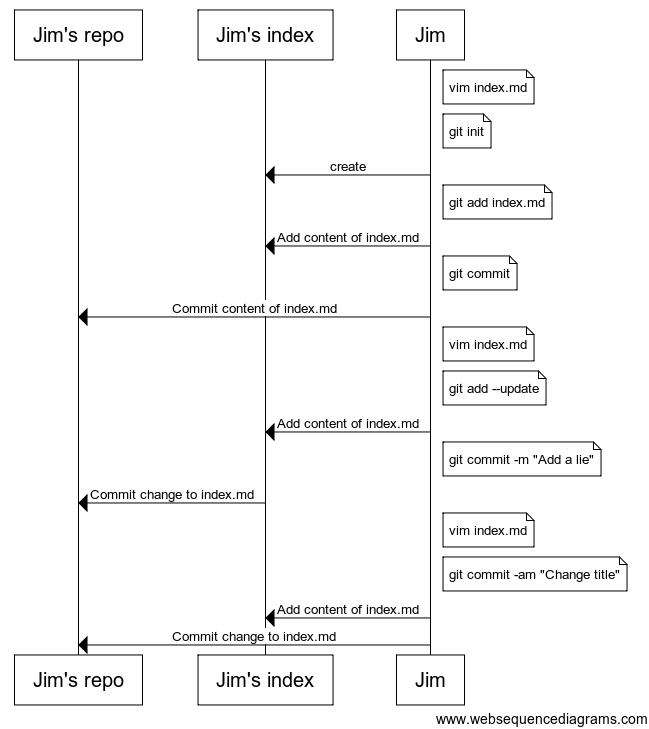

In [37]:
message="""
participant "Jim's repo" as R
participant "Jim's index" as I
participant Jim as J

note right of J: vim index.md

note right of J: git init
J->I: create
J>R: create

note right of J: git add index.md

J->I: Add content of index.md

note right of J: git commit
J->R: Commit content of index.md

note right of J:  vim index.md

note right of J: git add --update
J->I: Add content of index.md
note right of J: git commit -m "Add a lie"
I->R: Commit change to index.md

note right of J:  vim index.md
note right of J: git commit -am "Change title"
J->I: Add content of index.md
J->R: Commit change to index.md

"""
wsd(message)

###Referring to changes with HEAD and ^

The commit we want to revert to is the one before the latest.

`HEAD^` refers to the commit before the "head", which is the latest change. That is, we want to go back to the change before the current one. 

We could have used the hash code to reference this, but you can also refer to the commit before the `HEAD` as `HEAD^`, the one before that as `HEAD^^`, the one before that as `HEAD~3`. We could also refer to it with the hash code, e.g. 73fbeaf

###Reverting
 
Ok, so now we'd like to undo the nasty commit with the lie about Mount Fictional.

In [38]:
%%bash
git revert HEAD^

[master 523bace] Revert "Add a lie about a mountain"
 1 file changed, 1 insertion(+), 3 deletions(-)


A commit may pop up, with some default text which you can accept and save. 

###Conflicted reverts

You may, depending on the changes you've tried to make, get an error message here. 

If this happens, it is because git could not automagically decide how to combine the change you made after the change you want to revert, with the attempt to revert the change: this could happen, for example, if they both touch the same line. 

If that happens, you need to manually edit the file to fix the problem. Skip ahead to the section on resolving conflicts, or ask a demonstrator to help.

###Review of changes

The file should now contain the change to the title, but not the extra line with the lie. Note the log:

In [39]:
%%bash
git log

Mon Jul 27 16:58:32 2015 +0100 523bace (HEAD, master) Revert "Add a lie about a mountain"  [James Hetherington]
Mon Jul 27 16:58:32 2015 +0100 ffa72a4 Change title  [James Hetherington]
Mon Jul 27 16:58:31 2015 +0100 b799ca5 Add a lie about a mountain  [James Hetherington]
Mon Jul 27 16:58:29 2015 +0100 a39325c First commit of discourse on UK topography  [James Hetherington]

###Antipatch

Notice how the mistake has stayed in the history.

There is a new commit which undoes the change: this is colloquially called an "antipatch". 
This is nice: you have a record of the full story, including the mistake and its correction.

###Rewriting history

It is possible, in git, to remove the most recent change altogether, "rewriting history". Let's make another bad change, and see how to do this.

###A new lie

In [40]:
%%writefile index.md
Mountains and Hills in the UK   
===================   
Engerland is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.


Overwriting index.md


In [41]:
%%bash
cat index.md

Mountains and Hills in the UK   
Engerland is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.

In [42]:
%%bash
git diff

diff --git i/index.md w/index.md
index bb12a24..304eea2 100644
--- i/index.md
+++ w/index.md
@@ -1,4 +1,4 @@
 Mountains and Hills in the UK   
-England is not very mountainous.   
+Engerland is not very mountainous.   
 But has some tall hills, and maybe a mountain or two depending on your definition.
\ No newline at end of file


In [43]:
%%bash
git commit -am "Add a silly spelling"

[master 0989d6d] Add a silly spelling
 1 file changed, 1 insertion(+), 1 deletion(-)


In [44]:
%%bash
git log | head

Mon Jul 27 16:58:32 2015 +0100 0989d6d (HEAD, master) Add a silly spelling  [James Hetherington]
Mon Jul 27 16:58:32 2015 +0100 523bace Revert "Add a lie about a mountain"  [James Hetherington]
Mon Jul 27 16:58:32 2015 +0100 ffa72a4 Change title  [James Hetherington]
Mon Jul 27 16:58:31 2015 +0100 b799ca5 Add a lie about a mountain  [James Hetherington]
Mon Jul 27 16:58:29 2015 +0100 a39325c First commit of discourse on UK topography  [James Hetherington]

###Using reset to rewrite history

In [45]:
%%bash
git reset HEAD^

Unstaged changes after reset:
M	index.md


In [46]:
%%bash
git log --oneline

523bace Revert "Add a lie about a mountain"
ffa72a4 Change title
b799ca5 Add a lie about a mountain
a39325c First commit of discourse on UK topography


###Covering your tracks

The silly spelling is gone, and *it isn't even in the log*. This approach to fixing mistakes, "rewriting history" with `reset`, instead of adding an antipatch with `revert` is dangerous, and we don't recommend it. But you may want to do it for small silly mistakes, such as to correct a commit message.

###Resetting the working area

When git reset removes commits, it leaves your working directory unchanged -- so you can keep the work in the bad change if you want. 

In [47]:
%%bash
cat index.md

Mountains and Hills in the UK   
Engerland is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.

If you want to lose the change from the working directory as well, you can do `git reset --hard`. 

I'm going to get rid of the silly spelling, and I didn't do `--hard`, so I'll reset the file from the working directory to be the same as in the index:

In [48]:
%%bash
git checkout index.md

In [49]:
%%bash
cat index.md

Mountains and Hills in the UK   
England is not very mountainous.   
But has some tall hills, and maybe a mountain or two depending on your definition.

We can add this to our diagram:

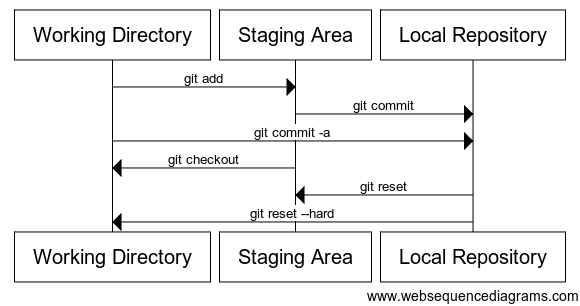

In [50]:
message="""
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Working Directory -> Local Repository : git commit -a
Staging Area -> Working Directory : git checkout
Local Repository -> Staging Area : git reset
Local Repository -> Working Directory: git reset --hard
"""
wsd(message)

Add add it to Jim's story:

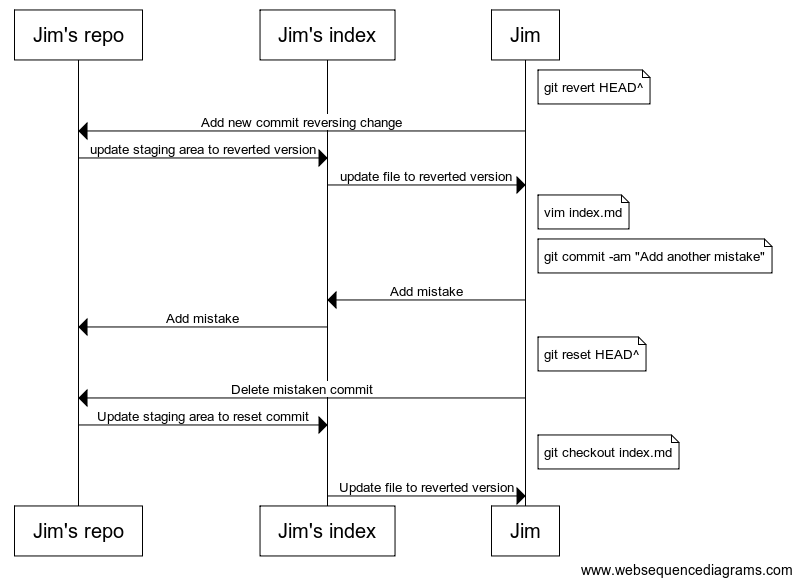

In [51]:
message="""
participant "Jim's repo" as R
participant "Jim's index" as I
participant Jim as J

note right of J: git revert HEAD^

J->R: Add new commit reversing change
R->I: update staging area to reverted version
I->J: update file to reverted version



note right of J: vim index.md
note right of J: git commit -am "Add another mistake"
J->I: Add mistake
I->R: Add mistake

note right of J: git reset HEAD^

J->R: Delete mistaken commit
R->I: Update staging area to reset commit

note right of J: git checkout index.md

I->J: Update file to reverted version


"""
wsd(message)

##Publishing

###Sharing your work

So far, all our work has been on our own computer. But a big part of the point of version control is keeping your work safe, on remote servers. Another part is making it easy to share your work with the world In this example, we'll be using the "GitHub" cloud repository to store and publish our work. 

If you have not done so already, you should create an account on GitHub: go to [https://github.com/](https://github.com/), fill in a username and password, and click on "sign up for free". 

###Creating a repository

Ok, let's create a repository to store our work. Hit "new repository" on the right of the github home screen, or click [here](https://github.com/new). 

Fill in a short name, and a description. Choose a "public" repository. Don't choose to add a Readme.

###Paying for GitHub

For this software carpentry course, you should use public repositories in your personal account for your example work: it's good to share! GitHub is free for open source, but in general, charges a fee if you want to keep your work private. 

In the future, you might want to keep your work on GitHub private. 

Students can get free private repositories on GitHub, by going to [https://github.com/edu] and filling in a form. 

UCL pays for private GitHub repositories for UCL research groups: you can find the service details on our [web page](../../infrastructure/github.html).

###Adding a new remote to your repository

Instructions will appear, once you've created the repository, as to how to add this new "remote" server to your repository, in the lower box on the screen. Mine say:

In [52]:
%%bash
git remote add origin git@github.com:UCL/github-example.git

In [53]:
%%bash
git push -uf origin master # I have an extra `f` switch here. You should copy the instructions from YOUR repository.

Branch master set up to track remote branch master from origin.


To git@github.com:UCL/github-example.git
 + 0bc817f...523bace master -> master (forced update)


###Remotes

The first command sets up the server as a new `remote`, called `origin`. 

Git, unlike some earlier version control systems is a "distributed" version control system, which means you can work with multiple remote servers. 

Usually, commands that work with remotes allow you to specify the remote to use, but assume the `origin` remote if you don't. 

Here, `git push` will push your whole history onto the server, and now you'll be able to see it on the internet! Refresh your web browser where the instructions were, and you'll see your repository!

Let's add these commands to our diagram:

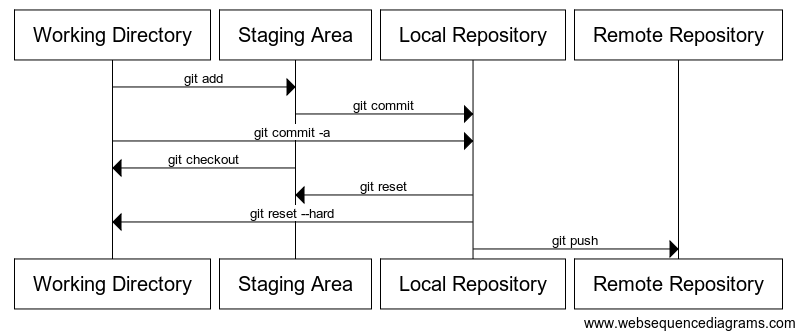

In [54]:
message="""
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Working Directory -> Local Repository : git commit -a
Staging Area -> Working Directory : git checkout
Local Repository -> Staging Area : git reset
Local Repository -> Working Directory: git reset --hard
Local Repository -> Remote Repository : git push
"""
wsd(message)

###Playing with GitHub

Take a few moments to click around and work your way through the GitHub interface. Try clicking on 'index.md' to see the content of the file: notice how the markdown renders prettily.

Click on "commits" near the top of the screen, to see all the changes you've made. Click on the commit number next to the right of a change, to see what changes it includes: removals are shown in red, and additions in green.

##Working with multiple files

###Some new content

So far, we've only worked with one file. Let's add another:

``` bash
vim lakeland.md
```

In [55]:
%%writefile lakeland.md
Lakeland  
========   
  
Cumbria has some pretty hills, and lakes too.  

Writing lakeland.md


In [56]:
cat lakeland.md

Lakeland  
  
Cumbria has some pretty hills, and lakes too.  

###Git will not by default commit your new file

In [57]:
%%bash
git commit -am "Try to add Lakeland"

On branch master
Your branch is up-to-date with 'origin/master'.
Untracked files:
	lakeland.md

nothing added to commit but untracked files present


This didn't do anything, because we've not told git to track the new file yet.

###Tell git about the new file

In [58]:
%%bash
git add lakeland.md
git commit -am "Add lakeland"

[master 7525ea9] Add lakeland
 1 file changed, 4 insertions(+)
 create mode 100644 lakeland.md


Ok, now we have added the change about Cumbria to the file. Let's publish it to the origin repository.

In [59]:
%%bash
git push

To git@github.com:UCL/github-example.git
   523bace..7525ea9  master -> master


Visit GitHub, and notice this change is on your repository on the server. We could have said `git push origin` to specify the remote to use, but origin is the default.

## Changing two files at once

What if we change both files?

In [60]:
%%writefile lakeland.md
Lakeland  
========   
  
Cumbria has some pretty hills, and lakes too

Mountains:
* Helvellyn

Overwriting lakeland.md


In [61]:
%%writefile index.md
Mountains and Lakes in the UK   
===================   
Engerland is not very mountainous.
But has some tall hills, and maybe a mountain or two depending on your definition.

Overwriting index.md


In [62]:
%%bash
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
	modified:   index.md
	modified:   lakeland.md

no changes added to commit


These changes should really be separate commits. We can do this with careful use of git add, to **stage** first one commit, then the other.

In [63]:
%%bash
git add index.md
git commit -m "Include lakes in the scope"

[master 8ebfe89] Include lakes in the scope
 1 file changed, 2 insertions(+), 2 deletions(-)


Because we "staged" only index.md, the changes to lakeland.md were not included in that commit.

In [64]:
%%bash
git commit -am "Add Helvellyn"

[master 6e1f668] Add Helvellyn
 1 file changed, 4 insertions(+), 1 deletion(-)


In [65]:
%%bash
git log

Mon Jul 27 16:58:37 2015 +0100 6e1f668 (HEAD, master) Add Helvellyn  [James Hetherington]
Mon Jul 27 16:58:37 2015 +0100 8ebfe89 Include lakes in the scope  [James Hetherington]
Mon Jul 27 16:58:36 2015 +0100 7525ea9 (origin/master) Add lakeland  [James Hetherington]
Mon Jul 27 16:58:32 2015 +0100 523bace Revert "Add a lie about a mountain"  [James Hetherington]
Mon Jul 27 16:58:32 2015 +0100 ffa72a4 Change title  [James Hetherington]
Mon Jul 27 16:58:31 2015 +0100 b799ca5 Add a lie about a mountain  [James Hetherington]
Mon Jul 27 16:58:29 2015 +0100 a39325c First commit of discourse on UK topography  [James Hetherington]

In [66]:
%%bash
git push

To git@github.com:UCL/github-example.git
   7525ea9..6e1f668  master -> master


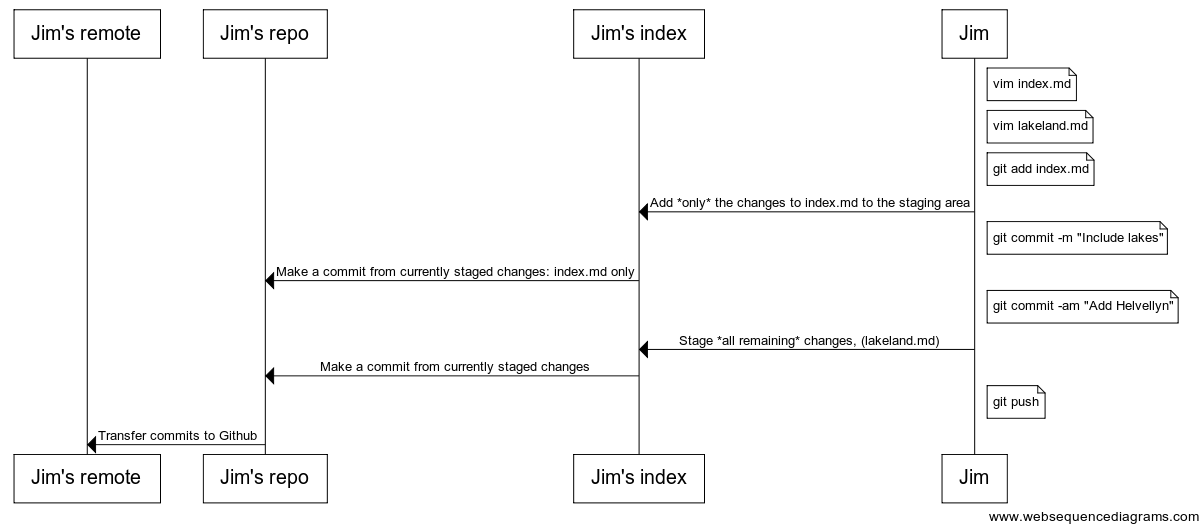

In [67]:
message="""
participant "Jim's remote" as M
participant "Jim's repo" as R
participant "Jim's index" as I
participant Jim as J

note right of J: vim index.md
note right of J: vim lakeland.md

note right of J: git add index.md
J->I: Add *only* the changes to index.md to the staging area

note right of J: git commit -m "Include lakes"
I->R: Make a commit from currently staged changes: index.md only

note right of J: git commit -am "Add Helvellyn"
J->I: Stage *all remaining* changes, (lakeland.md)
I->R: Make a commit from currently staged changes

note right of J: git push
R->M: Transfer commits to Github
"""
wsd(message)

##Collaboration

###Form a team

Now we're going to get to the most important question of all with Git and GitHub: working with others.

Organise into pairs. You're going to be working on the website of one of the two of you, together, so decide who is going to be the leader, and who the collaborator.

###Giving permission

The leader needs to let the collaborator have the right to make changes to his code.

In GitHub, go to `settings` on the right, then `collaborators` on the left.

Add the user name of your collaborator to the box. They now have the right to push to your repository.

###Obtaining a colleague's code

Next, the collaborator needs to get a copy of the leader's code. For this example notebook,
I'm going to be collaborating with myself, swapping between my two repositories.
Make yourself a space to put it:

In [68]:
%%bash
cd .. # EXIT our previous git example, important
pwd
rm -rf github-example # cleanup after previous example
rm -rf partner_dir # cleanup after previous example


/Users/jamespjh/devel/rsdt/training/rsd-engineeringcourse/session02/learning_git


In [69]:
os.chdir(git_dir)

Next, the collaborator needs to find out the URL of the repository: they should go to the leader's repository's GitHub page, and note the URL on the top of the screen. Make sure the "ssh" button is pushed, the URL should begin with `git@github.com`. 

Copy the URL into your clipboard by clicking on the icon to the right of the URL, and then:

In [70]:
%%bash
pwd
git clone git@github.com:UCL/github-example.git
mv github-example partner_dir

/Users/jamespjh/devel/rsdt/training/rsd-engineeringcourse/session02/learning_git


Cloning into 'github-example'...


In [71]:
partner_dir=os.path.join(git_dir, 'partner_dir')
os.chdir(partner_dir)

In [72]:
%%bash
pwd
ls

/Users/jamespjh/devel/rsdt/training/rsd-engineeringcourse/session02/learning_git/partner_dir
index.md
lakeland.md


Note that your partner's files are now present on your disk:

In [73]:
%%bash
cat lakeland.md

Lakeland  
  
Cumbria has some pretty hills, and lakes too

Mountains:
* Helvellyn

###Nonconflicting changes

Now, both of you should make some changes. To start with, make changes to *different* files. This will mean your work doesn't "conflict". Later, we'll see how to deal with changes to a shared file.

Both of you should commit, but not push, your changes to your respective files:

E.g., the leader:

In [74]:
os.chdir(working_dir)

In [75]:
%%writefile Wales.md
Mountains In Wales
==================

* Tryfan
* Yr Wyddfa

Writing Wales.md


In [76]:
%%bash
ls

Wales.md
index.md
lakeland.md


In [77]:
%%bash
git add Wales.md
git commit -m "Add wales"

[master 66eb585] Add wales
 1 file changed, 5 insertions(+)
 create mode 100644 Wales.md


And the partner:

In [78]:
os.chdir(partner_dir)

In [79]:
%%writefile Scotland.md
Mountains In Scotland
==================

* Ben Eighe
* Cairngorm

Writing Scotland.md


In [80]:
%%bash
ls

Scotland.md
index.md
lakeland.md


In [81]:
%%bash
git add Scotland.md
git commit -m "Add Scotland"

[master 3ed6142] Add Scotland
 1 file changed, 5 insertions(+)
 create mode 100644 Scotland.md


One of you should now push with `git push`:

In [82]:
%%bash
git push

To git@github.com:UCL/github-example.git
   6e1f668..3ed6142  master -> master


###Rejected push

The other should then push, but should receive an error message:

In [83]:
os.chdir(working_dir)

In [84]:
%%bash
git push

To git@github.com:UCL/github-example.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'git@github.com:UCL/github-example.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


Do as it suggests:

In [85]:
%%bash
git pull

Merge made by the 'recursive' strategy.
 Scotland.md | 5 +++++
 1 file changed, 5 insertions(+)
 create mode 100644 Scotland.md


From github.com:UCL/github-example
   6e1f668..3ed6142  master     -> origin/master


###Merge commits

A window may pop up with a suggested default commit message. This commit is special: it is a *merge* commit. It is a commit which combines your collaborator's work with your own.

Now, push again with `git push`. This time it works. If you look on GitHub, you'll now see that it contains both sets of changes.

In [86]:
%%bash
git push

To git@github.com:UCL/github-example.git
   3ed6142..c1873ec  master -> master


The partner now needs to pull down that commit:

In [87]:
os.chdir(partner_dir)

In [88]:
%%bash
git pull

Updating 3ed6142..c1873ec
Fast-forward
 Wales.md | 5 +++++
 1 file changed, 5 insertions(+)
 create mode 100644 Wales.md


From github.com:UCL/github-example
   3ed6142..c1873ec  master     -> origin/master


In [89]:
%%bash
ls

Scotland.md
Wales.md
index.md
lakeland.md


###Nonconflicted commits to the same file

Go through the whole process again, but this time, both of you should make changes to a single file, but make sure that you don't touch the same *line*. Again, the merge should work as before:

In [90]:
%%writefile Wales.md
Mountains In Wales
==================

* Tryfan
* Snowdon

Overwriting Wales.md


In [91]:
%%bash
git diff

diff --git i/Wales.md w/Wales.md
index 3809c69..e2ca555 100644
--- i/Wales.md
+++ w/Wales.md
@@ -2,4 +2,4 @@ Mountains In Wales
 
 * Tryfan
-* Yr Wyddfa
\ No newline at end of file
+* Snowdon
\ No newline at end of file


In [92]:
%%bash
git commit -am "Translating from the Welsh"

[master 500ba50] Translating from the Welsh
 1 file changed, 1 insertion(+), 1 deletion(-)


In [93]:
%%bash
git log --oneline

500ba50 Translating from the Welsh
c1873ec Merge branch 'master' of github.com:UCL/github-example
66eb585 Add wales
3ed6142 Add Scotland
6e1f668 Add Helvellyn
8ebfe89 Include lakes in the scope
7525ea9 Add lakeland
523bace Revert "Add a lie about a mountain"
ffa72a4 Change title
b799ca5 Add a lie about a mountain
a39325c First commit of discourse on UK topography


In [94]:
os.chdir(working_dir)

In [95]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon

Overwriting Wales.md


In [96]:
%%bash
git commit -am "Add a beacon"

[master 706ed26] Add a beacon
 1 file changed, 2 insertions(+), 1 deletion(-)


In [97]:
%%bash
git log --oneline

706ed26 Add a beacon
c1873ec Merge branch 'master' of github.com:UCL/github-example
66eb585 Add wales
3ed6142 Add Scotland
6e1f668 Add Helvellyn
8ebfe89 Include lakes in the scope
7525ea9 Add lakeland
523bace Revert "Add a lie about a mountain"
ffa72a4 Change title
b799ca5 Add a lie about a mountain
a39325c First commit of discourse on UK topography


In [98]:
%%bash
git push

To git@github.com:UCL/github-example.git
   c1873ec..706ed26  master -> master


Switching back to the other partner...

In [99]:
os.chdir(partner_dir)

In [100]:
%%bash
git push

To git@github.com:UCL/github-example.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'git@github.com:UCL/github-example.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [101]:
%%bash
git pull

Merge made by the 'recursive' strategy.
 Wales.md | 1 +
 1 file changed, 1 insertion(+)


From github.com:UCL/github-example
   c1873ec..706ed26  master     -> origin/master


In [102]:
%%bash
git push

To git@github.com:UCL/github-example.git
   706ed26..33ef37d  master -> master


In [103]:
%%bash
git log --oneline --graph

*   33ef37d Merge branch 'master' of github.com:UCL/github-example
|\  
| * 706ed26 Add a beacon
* | 500ba50 Translating from the Welsh
|/  
*   c1873ec Merge branch 'master' of github.com:UCL/github-example
|\  
| * 3ed6142 Add Scotland
* | 66eb585 Add wales
|/  
* 6e1f668 Add Helvellyn
* 8ebfe89 Include lakes in the scope
* 7525ea9 Add lakeland
* 523bace Revert "Add a lie about a mountain"
* ffa72a4 Change title
* b799ca5 Add a lie about a mountain
* a39325c First commit of discourse on UK topography


In [104]:
os.chdir(working_dir)

In [105]:
%%bash
git pull

Updating 706ed26..33ef37d
Fast-forward


From github.com:UCL/github-example
   706ed26..33ef37d  master     -> origin/master


In [106]:
%%bash
git log --graph --oneline

*   33ef37d Merge branch 'master' of github.com:UCL/github-example
|\  
| * 706ed26 Add a beacon
* | 500ba50 Translating from the Welsh
|/  
*   c1873ec Merge branch 'master' of github.com:UCL/github-example
|\  
| * 3ed6142 Add Scotland
* | 66eb585 Add wales
|/  
* 6e1f668 Add Helvellyn
* 8ebfe89 Include lakes in the scope
* 7525ea9 Add lakeland
* 523bace Revert "Add a lie about a mountain"
* ffa72a4 Change title
* b799ca5 Add a lie about a mountain
* a39325c First commit of discourse on UK topography


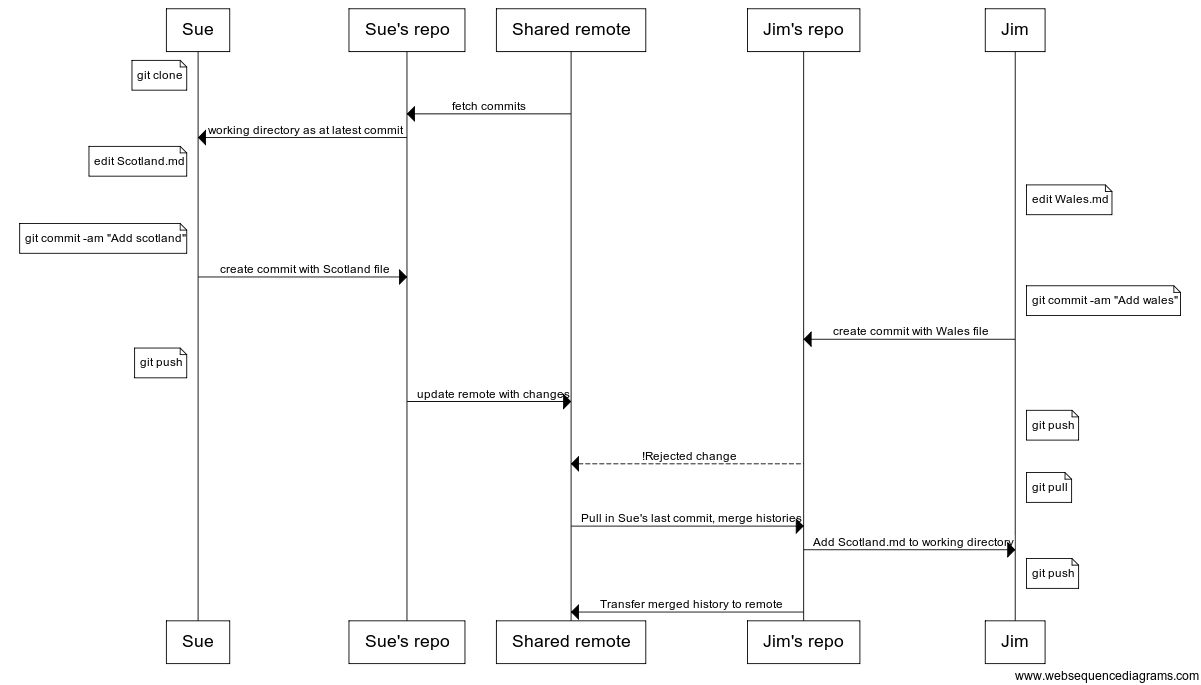

In [107]:
message="""
participant Sue as S
participant "Sue's repo" as SR
participant "Shared remote" as M
participant "Jim's repo" as JR
participant Jim as J

note left of S: git clone
M->SR: fetch commits
SR->S: working directory as at latest commit

note left of S: edit Scotland.md
note right of J: edit Wales.md

note left of S: git commit -am "Add scotland"
S->SR: create commit with Scotland file

note right of J: git commit -am "Add wales"
J->JR: create commit with Wales file

note left of S: git push
SR->M: update remote with changes

note right of J: git push
JR-->M: !Rejected change

note right of J: git pull
M->JR: Pull in Sue's last commit, merge histories
JR->J: Add Scotland.md to working directory

note right of J: git push
JR->M: Transfer merged history to remote

"""
wsd(message)

###Conflicting commits

Finally, go through the process again, but this time, make changes which touch the same line.

In [108]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Fan y Big

Overwriting Wales.md


In [109]:
%%bash
git commit -am "Add another Beacon"
git push

[master 61e9de0] Add another Beacon
 1 file changed, 2 insertions(+), 1 deletion(-)


To git@github.com:UCL/github-example.git
   33ef37d..61e9de0  master -> master


In [110]:
os.chdir(partner_dir)

In [111]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Glyder Fawr

Overwriting Wales.md


In [112]:
%%bash
git commit -am "Add Glyder"
git push

[master a17cf2f] Add Glyder
 1 file changed, 2 insertions(+), 1 deletion(-)


To git@github.com:UCL/github-example.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'git@github.com:UCL/github-example.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


When you pull, instead of offering an automatic merge commit message, it says:

In [113]:
%%bash
git pull

CONFLICT (content): Merge conflict in Wales.md
Automatic merge failed; fix conflicts and then commit the result.


From github.com:UCL/github-example
   33ef37d..61e9de0  master     -> origin/master
Recorded preimage for 'Wales.md'


###Resolving conflicts

Git couldn't work out how to merge the two different sets of changes.

You now need to manually resolve the conflict.

It has marked the conflicted area:

In [114]:
%%bash
cat Wales.md

Mountains In Wales

* Pen y Fan
* Tryfan
* Snowdon
<<<<<<< HEAD
* Glyder Fawr
* Fan y Big
>>>>>>> 61e9de05d646181c3569b60320fc445e7f764bd9


Manually edit the file, to combine the changes as seems sensible and get rid of the symbols:

In [115]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Glyder Fawr
* Fan y Big

Overwriting Wales.md


###Commit the resolved file

Now commit the merged result:

In [116]:
%%bash
git commit -a --no-edit # I added a No-edit for this non-interactive session. You can edit the commit if you like.

[master 933656e] Merge branch 'master' of github.com:UCL/github-example


Recorded resolution for 'Wales.md'.


In [117]:
%%bash
git push

To git@github.com:UCL/github-example.git
   61e9de0..933656e  master -> master


In [118]:
os.chdir(working_dir)

In [119]:
%%bash
git pull

Updating 61e9de0..933656e
Fast-forward
 Wales.md | 1 +
 1 file changed, 1 insertion(+)


From github.com:UCL/github-example
   61e9de0..933656e  master     -> origin/master


In [124]:
%%bash
cat Wales.md

Mountains In Wales

* Pen y Fan
* Tryfan
* Snowdon
* Glyder Fawr
* Fan y Big

In [120]:
%%bash
git log --oneline --graph

*   933656e Merge branch 'master' of github.com:UCL/github-example
|\  
| * 61e9de0 Add another Beacon
* | a17cf2f Add Glyder
|/  
*   33ef37d Merge branch 'master' of github.com:UCL/github-example
|\  
| * 706ed26 Add a beacon
* | 500ba50 Translating from the Welsh
|/  
*   c1873ec Merge branch 'master' of github.com:UCL/github-example
|\  
| * 3ed6142 Add Scotland
* | 66eb585 Add wales
|/  
* 6e1f668 Add Helvellyn
* 8ebfe89 Include lakes in the scope
* 7525ea9 Add lakeland
* 523bace Revert "Add a lie about a mountain"
* ffa72a4 Change title
* b799ca5 Add a lie about a mountain
* a39325c First commit of discourse on UK topography


###Distributed VCS in teams with conflicts

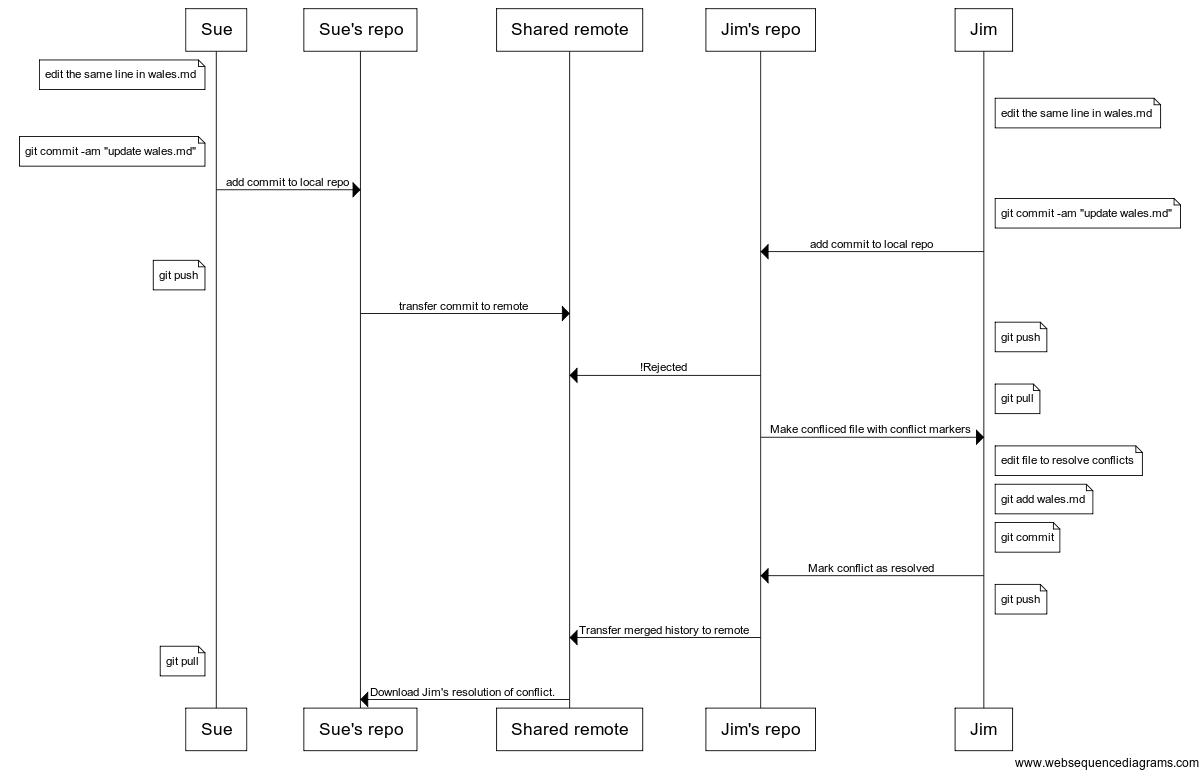

In [121]:
message="""
participant Sue as S
participant "Sue's repo" as SR
participant "Shared remote" as M
participant "Jim's repo" as JR
participant Jim as J

note left of S: edit the same line in wales.md
note right of J: edit the same line in wales.md
    
note left of S: git commit -am "update wales.md"
S->SR: add commit to local repo
    
note right of J: git commit -am "update wales.md"
J->JR: add commit to local repo
    
note left of S: git push
SR->M: transfer commit to remote
    
note right of J: git push
JR->M: !Rejected

note right of J: git pull
JR->J: Make confliced file with conflict markers
    
note right of J: edit file to resolve conflicts
note right of J: git add wales.md
note right of J: git commit
J->JR: Mark conflict as resolved

note right of J: git push
JR->M: Transfer merged history to remote

note left of S: git pull
M->SR: Download Jim's resolution of conflict.
    
"""

wsd(message)

###The Levels of Git

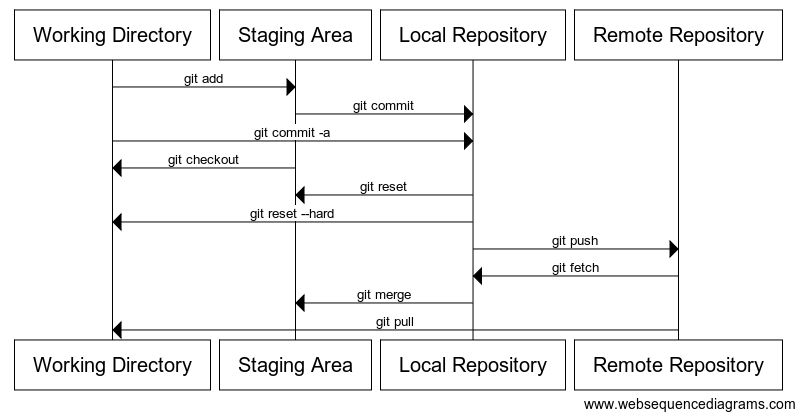

In [122]:
message="""
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Working Directory -> Local Repository : git commit -a
Staging Area -> Working Directory : git checkout
Local Repository -> Staging Area : git reset
Local Repository -> Working Directory: git reset --hard
Local Repository -> Remote Repository : git push
Remote Repository -> Local Repository : git fetch
Local Repository -> Staging Area : git merge
Remote Repository -> Working Directory: git pull
"""

wsd(message)

##Editing directly on GitHub

###Editing directly on GitHub

Note that you can also make changes in the GitHub website itself. Visit one of your files, and hit "edit".

Make a change in the edit window, and add an appropriate commit message.

That change now appears on the website, but not in your local copy. (Verify this). 

Now pull, and check the change is now present on your local version. 

##Social Coding

###GitHub as a social network

In addition to being a repository for code, and a way to publish code, GitHub is a social network.  

You can follow the public work of other coders: go to the profile of your collaborator in your browser, and it the "follow" button. 

[Here's mine](https://github.com/jamespjh) : if you want to you can follow me.

Using GitHub to build up a good public profile of software projects you've worked on is great for your CV!

##Software Licensing

###Reuse

This course is distributed under the [Creative Commons By Attribution license](https://creativecommons.org/licenses/by/3.0/), which means you can modify and reuse the materials, so long as you credit [UCL Research IT Services](http://www.ucl.ac.uk/research-it-services/homepage).

###Disclaimer

Here we attempt to give some basic advice on choosing a license for your software. But:

* we are NOT lawyers
* opinions differ (and flamewars are boring)
* this training does NOT constitute legal advice. 

For an in-depth discussion of software licenses, read the [O'Reilly book](http://www.amazon.co.uk/Understanding-Open-Source-Software-Licensing-ebook/dp/B0026OR3J4/ref=tmm_kin_title_0).

Your department, or UCL, may have policies about applying licenses to code you create while a UCL employee or student. This training doesn't address this issue, and does not represent UCL policy -- seek advice from your supervisor or manager if concerned.

###Choose a license

It is important to choose a license and to create a *license file* to tell people what it is. 

The license lets people know whether they can reuse your code and
under what terms. [This course has one](https://github.com/UCL/rsd-engineeringcourse/blob/master/LICENSE.md), for example.

Your license file should typically be called LICENSE.txt or similar. GitHub will offer to create a license file automatically when you create a new repository.

###Open source doesn't stop you making money

A common misconception about open source software is the thought that
open source means you can't make any money. This is *wrong*. 

Plenty of people open source their software and profit from:

* The software under a different license e.g. [Saxon](http://saxon.sourceforge.net/)
* Consulting. For example: [Continuum](http://continuum.io/consulting) who help maintain NumPy
* Manuals. For example: [VTK](http://www.vtk.org/)
* Add-ons. For example: [Puppet](http://puppetlabs.com/puppet/enterprise-vs-open-source)
* Server software, which open source client software interacts with. For example: [GitHub API clients](https://github.com/octokit/octokit.rb)

###Plagiarism vs promotion

Many researchers worry about people stealing their work if they open source their code. But often the biggest problem is not theft, but the fact no one is aware of your work.

Open source is a way to increase the probability that someone else on the planet will care enough about your work to cite you.

So when thinking about whether to open source your code, think about whether you're more worried about
anonymity or theft.

###Your code *is* good enough

New coders worry that they'll be laughed at if they put their code online. Don't worry. Everyone, including people who've been coding for decades, 
writes shoddy code that is full of bugs.

The only thing that will make your code better, is *other people reading it*. 

For small scripts that no one but you will ever use,
my recommendation is to use an open repository anyway. 
Find a buddy, and get them to comment on it.

###Worry about license compatibility and proliferation

Not all open source code can be used in all projects. Some licenses are legally incompatible.

This is a huge and annoying problem. 
As an author, you might not care, but you can't anticipate the exciting uses people might find by
mixing your code with someone else's. 

Use a standard license from the small list that are well-used.
Then people will understand. *Don't make up your own*.

When you're about to use a license, see if there's a more common one which is recommended, e.g.:
using the [opensource.org proliferation report](http://opensource.org/proliferation-report)

###Academic license proliferation

Academics often write their own license terms for their software.

For example:

>XXXX NON-COMMERCIAL EDUCATIONAL LICENSE
>Copyright (c) 2013 Prof. Foo.
>All rights reserved.
>
>You may use and modify this software for any non-commercial purpose within your educational 
>institution. Teaching, academic research, and personal experimentation are examples of purpose 
>which can be non-commercial.
>
>You may redistribute the software and modifications to the software for non-commercial 
>purposes, but only to eligible users of the software (for example, to another university
>student or faculty to support joint academic research).

Please don't do this. Your desire to slightly tweak the terms is harmful to the
future software ecosystem. Also, *Unless you are a lawyer, you cannot do this safely!*

###Licenses for code, content, and data.

Licenses designed for code should not be used to license data or prose.

Don't use Creative Commons for software, or GPL for a book.

###Licensing issues

* Permissive vs share-alike
* Non-commercial and academic Use Only
* Patents
* Use as a web service

###Permissive vs share-alike

Some licenses require all derived software to be licensed under terms that are similarly free.
Such licenses are called "Share Alike" or "Copyleft".

* Licenses in this class include the GPL.

Those that don't are called "Permissive"

* These include Apache, BSD, and MIT licenses.

If you want your code to be maximally reusable, use a permissive license
If you want to force other people using your code to make derivatives open source, use a copyleft license.

If you want to use code that has a permissive license, it's safe to use it and keep your code secret.
If you want to use code that has a copyleft license, you'll have to release your code under such a license.

###Academic use only

Some researchers want to make their code free for 'academic use only'.
None of the standard licenses state this, and this is a reason why academic bespoke licenses proliferate.

However, there is no need for this, in our opinion.

*Use of a standard Copyleft license precludes derived software from being sold without also publishing the source*

So use of a Copyleft license precludes commercial use.

This is a very common way of making a business from open source code: offer the code under GPL for free
but offer the code under more permissive terms, allowing for commercial use, for a fee.

###Patents

Intellectual property law distinguishes copyright from patents. 
This is a complex field, which I am far from qualified to teach!

People who think carefully about intellectual property law distinguish software licenses
based on how they address patents. Very roughly, if a you want to ensure that contributors to your project
can't then go off and patent their contribution, some licenses, such as the Apache license, protect you from this.

###Use as a web service

If I take copyleft code, and use it to host a web service, I have not sold the software.

Therefore, under some licenses, I do not have to release any derivative software.
This "loophole" in the GPL is closed by the AGPL ("Affero GPL")

###Library linking

If I use your code just as a library, without modifying it or including it directly in my own code, 
does the copyleft term of the GPL apply?

*Yes*

If you don't want it to, use the LGPL. ("Lesser GPL"). This has an exception for linking libraries.

###Citing software

Almost all software licenses require people to credit you for what they used ("attribution").

In an academic context, it is useful to offer a statement as to how best to do this,
citing *which paper to cite in all papers which use the software*.

This is best done with a [CITATION](http://www.software.ac.uk/blog/2013-09-02-encouraging-citation-software-introducing-citation-files) file in your repository.

> To cite ggplot2 in publications, please use:

>  H. Wickham. ggplot2: elegant graphics for data analysis. Springer New York,
 2009.

> A BibTeX entry for LaTeX users is

> @Book{,
   author = {Hadley Wickham},
   title = {ggplot2: elegant graphics for data analysis},
   publisher = {Springer New York},
   year = {2009},
   isbn = {978-0-387-98140-6},
   url = {http://had.co.nz/ggplot2/book},
 }

###Referencing the license in every file

Some licenses require that you include license information in every file.
Others do not. 

Typically, every file should contain something like:

In [123]:
// (C) University College London 2010-2014
// This software is licensed under the terms of the <foo license>
// See <somewhere> for the license details.

SyntaxError: invalid syntax (<ipython-input-123-d33bf949fd22>, line 1)

Check your license at
[opensource.org](http://opensource.org/) for details of how to apply it to your software. For example, for the [GPL](http://opensource.org/licenses/GPL-3.0#howto)

###Choose a license

See [GitHub's advice on how to choose a license](http://choosealicense.com/)

###Open source does not equal free maintenance

One common misunderstanding of open source software is that you'll automatically get loads of contributors from around the internets.
This is wrong. Most open source projects get no commits from anyone else.

Open source does *not* guarantee your software will live on with people adding to it after you stop working on it.

Later in the course, we'll offer some advice on [Software Sustainability](http://software.ac.uk/resources/about)

##Managing software issues

###Issues

Code has *bugs*. It also has *features*, things it should do.

A good project has an organised way of managing these. Generally you should use an issue tracker.

###Some Issue Trackers

There are lots of good issue trackers.

The most commonly used open source ones are [Trac](http://trac.edgewall.org/) and [Redmine](http://www.redmine.org/).

Cloud based issue trackers include [Lighthouse](http://lighthouseapp.com/) and [GitHub](https://github.com/blog/831-issues-2-0-the-next-generation).

Commercial solutions include [Jira](https://www.atlassian.com/software/jira).

In this course, we'll be using the GitHub issue tracker.

###Anatomy of an issue

* Reporter
* Description
* Owner
* Type [Bug, Feature]
* Component
* Status
* Severity

###Reporting a Bug

The description should make the bug reproducible:

* Version
* Steps

If possible, submit a minimal reproducing code fragment.

###Owning an issue

* Whoever the issue is assigned to works next.
* If an issue needs someone else's work, assign it to them.

###Status 

* Submitted
* Accepted
* Underway
* Blocked

###Resolutions

* Resolved
* Will Not Fix
* Not reproducible
* Not a bug (working as intended)

###Bug triage

Some organisations use a severity matrix based on:

* Severity [Wrong answer, crash, unusable, workaround, cosmetic...]
* Frequency [All users, most users, some users...]

###The backlog

The list of all the bugs that need to be fixed or
features that have been requested is called the "backlog".

###Development cycles

Development goes in *cycles*.

Cycles range in length from a week to three months.

In a given cycle:

* Decide which features should be implemented
* Decide which bugs should be fixed
* Move these issues from the Backlog into the current cycle. (Aka Sprint)

###GitHub issues

GitHub doesn't have separate fields for status, component, severity etc.
Instead, it just has labels, which you can create and delete.

See for example [IPython](https://github.com/ipython/ipython/issues?labels=type-bug&page=1&state=open)